In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tweepy
import csv
import math
import heapq

In [2]:
consumer_key = "h2xAoS2a53tym66zuL4AT4XsP"
consumer_secret = "lYYTpZVAsI2bD1sLlfaKPFMrTFXy5TklGgcxuroYZf9efzOBsZ"
access_key = "737957992050659328-TficjmvwqLvCl0FceIt8dBBZWwkGD58"
access_secret = "lJ95FFKiWzJZ5roZpjPGBlXfnpzGGJmZUNpfdT4zSelf0"

In [6]:
def get_tweets(user_name):
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    new_tweets, alltweets = api.user_timeline(screen_name = user_name, count=200), []
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    
    
    while len(alltweets) <= 3200:
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = user_name,count=200,max_id=oldest,include_entities=True)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        a, b, outtweets = "0", "0", []
        for tweet in alltweets:
            a = "https://twitter.com/i/web/status/" + tweet.id_str
            outtweets.append([tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count, tweet.retweet_count, a])
        with open('%s_tweets.csv' % user_name, 'w') as f:
            writer = csv.writer(f)
            writer.writerow(["id","created_at","text", "favorite_count", "retweet_count", "extended_url"])
            writer.writerows(outtweets)
        pass
    return alltweets

In [7]:
INC_alltweets = get_tweets("INCIndia")

In [8]:
def get_count_media(tweet_list):
    count_media = 0
    for tweet in tweet_list:
        if 'media' in tweet.entities:
            media=tweet.entities['media']
            if media[0]['type'] == 'photo':
                count_media = count_media + 1
    return count_media

In [9]:
count_media = get_count_media(INC_alltweets)

print(count_media)

370


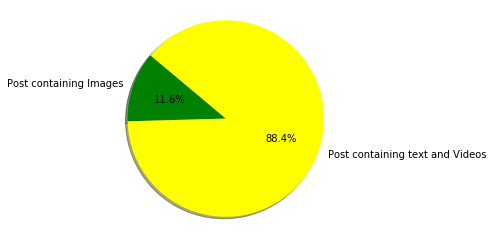

In [12]:
labels = "Post containing Images", "Post containing text and Videos"
sizes = [count_media, 3200-count_media]
plt.pie(sizes, explode=(0,0), labels=labels, colors=['green', 'yellow'],autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [13]:
with open("INCIndia_tweets.csv") as csvfile:
    tweets_INC = list(csv.reader(csvfile))[1:]
    print(tweets_INC[0])

['1117364091822145536', '2019-04-14 09:48:53', "A moment of innocence &amp; love captured at Smt. @priyankagandhi's roadshow in Assam. \n\n#PriyankaGandhiInAssam https://t.co/cVDP0qPcvi", '4384', '910', 'https://twitter.com/i/web/status/1117364091822145536']


In [14]:
def get_popular_tweet_list(tweet_list):
    popular_tweet_list = [((int)(tweet_list[i][4])*5 + (int)(tweet_list[i][3])) for i in range(3200)]
    larg_1000 = heapq.nlargest(1000, popular_tweet_list)
    indices_lis = [popular_tweet_list.index(elem) for elem in larg_1000]
    print("Top 5 Most popular Tweets: ")
    for i in range(5):
        print("Popularity Score: ", larg_1000[i], "Tweet: ", tweet_list[indices_lis[i]][2])    
    return indices_lis

In [15]:
indices_lis = get_popular_tweet_list(tweets_INC)

Top 5 Most popular Tweets: 
Popularity Score:  104360 Tweet:  RT @RahulGandhi: Well done DRDO, extremely proud of your work. 

I would also like to wish the PM a very happy World Theatre Day.
Popularity Score:  103290 Tweet:  RT @capt_amarinder: Dear @narendramodi ji , I’m touring the border areas of Punjab &amp; I’m presently in Amritsar. Came to know that @pid_gov…
Popularity Score:  101160 Tweet:  RT @RahulGandhi: Youngsters, 

Want to start a new business? Want to create jobs for India? 
Here’s our plan for you:

1. ZERO permissions…
Popularity Score:  92390 Tweet:  RT @RahulGandhi: NO ONE KILLED...

Haren Pandya.

Tulsiram Prajapati.

Justice Loya.

Prakash Thombre. 

Shrikant Khandalkar.

Kauser Bi.…
Popularity Score:  91170 Tweet:  RT @RahulGandhi: It's done! 

Rajasthan, Madhya Pradesh &amp; Chhattisgarh have waived farm loans.

We asked for 10 days. 

We did it in 2.


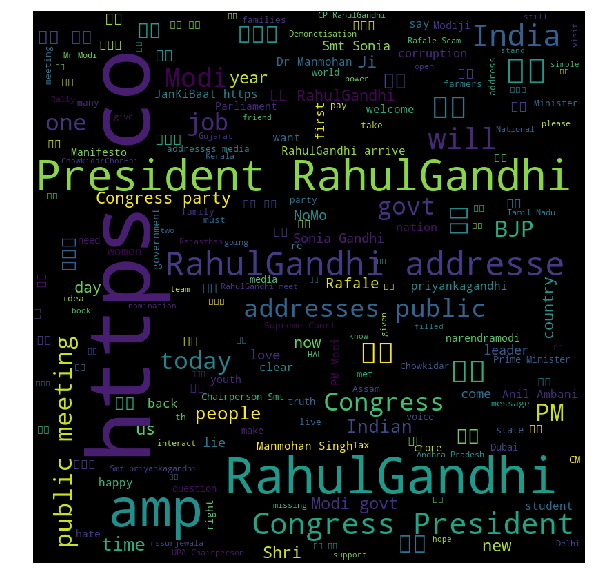

In [16]:
def generateWordClouds():
    comment_words = ' '
    stopwords = set(STOPWORDS)
    
    for i in range(1000):
        i = str(tweets_INC[indices_lis[i]][2])
        tokens = i.split()
        if len(tokens) == 0:
            continue
        else:
            tokens = tokens[1:]
            comment_words +=' '.join(tokens)
            
    wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(comment_words)
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

generateWordClouds()

In [24]:
def get_hash_dict_tweet(tweet_list):
#     alltweets = get_tweets(username)
    hashtags_dict = {}
    for tweet in tweet_list:
        hashtags = tweet.entities.get('hashtags')
        for hashtag1 in hashtags:
            if hashtag1['text'] in hashtags_dict.keys():
                hashtags_dict[hashtag1['text']] += 1
            else:
                hashtags_dict[hashtag1['text']] = 1
    
    return hashtags_dict

In [25]:
INC_hashtags_dict = get_hash_dict_tweet(INC_alltweets)

print(INC_hashtags_dict)

{'PriyankaGandhiInAssam': 1, 'RamNavami': 2, 'HappyBaisakhi': 1, 'TamilNewYear': 1, 'NYAYforKarnataka': 2, 'RafaleChorChowkidar': 2, 'KarnatakaWithMaithri': 1, 'JallianwalaBagh': 1, 'NammaThalaivarRahulGandhi': 4, 'SoniaGandhiRaeBareli': 3, 'JanSankalpRally': 6, 'BengalWithRahulGandhi': 1, 'RafaleDeal': 2, 'ChowkidarChorHai': 14, 'AmethiKaRahulGandhi': 1, 'DemonetisationScam': 1, 'Scared2Debate': 2, 'BJPJumlaManifesto': 12, 'AbHogaNYAY': 7, 'AcrosstheAisle': 1, 'InConversationWith': 12, 'HumaroRahulGandhi': 2, 'PeoplesAgenda2019': 2, 'GudiPadwa': 1, 'Navratri': 1, 'नवरात्रि': 1, 'नववर्ष': 1, 'HappyUgadi': 1, 'AmchaRahulGandhi': 2, 'RahulGandhiStudentsInteraction': 1, 'RafaleScam': 24, 'RahulGandhiWayanad': 1, 'RahulTharangam': 1, 'CashForVotesModi': 1, 'HumNibhayenge': 1, 'AssamWelcomesRahulGandhi': 1, 'NagalandWelcomesRahulGandhi': 1, 'CongressManifesto2019': 6, 'ModiMatBanao': 3, 'TelanganaProgressWithCongress': 4, 'GabbarSinghTax': 5, 'MaithriForKarnataka': 1, 'EkHiChowkidarChorHai'

In [26]:
reverse_sorted_dict = sorted(INC_hashtags_dict, key=INC_hashtags_dict.get, reverse=True)
print(reverse_sorted_dict[0:5])

['RafaleScam', 'JanKiBaat', 'OneNationBillionIdeas', 'ChowkidarChorHai', 'LoveNotHate']
